# **Fazer a Regressão para Prever o Preço da Casa**

**Nome:** Gabriel Antunes Soares

Arquivo da análise exploratória de dados (EDA) e criação do modelo de regressão linear utilizando sklearn.

# 0 - Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 1 - Data

## 1.1 - Data Understanding


In [ ]:
houseData = pd.read_csv("kc_house_data.csv")
houseData.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


In [ ]:
houseData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
houseData.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
houseData["waterfront"].value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

Verificar se havia 1s no waterfront, pois só tinha aparecido 0 no head. Ai qualquer coisa eu podia ter dropado, mas há alguns que são 1 e uma hipótese já é que deva influênciar no preço.

In [ ]:
houseData["view"].value_counts()

0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64

Entender melhor como funciona a view, aparentemente é uma nota relaciona com a vista da casa. Hipótese é que quanto maior a view, maior o preço.

## 1.2 - Data Analysis & Cleaning

Analizar quais variáveis são importantes e quais não são para o nosso modelo. Foram realizados testes e verificação de hipoteses.

In [ ]:
plt.figure(figsize=(7,4))

<Figure size 700x400 with 0 Axes>

<Figure size 700x400 with 0 Axes>

### Heatmap pra servir de base para as hipóteses.

Identifica quais variáveis estão correlacionadas.

<ipython-input-62-f040521ff73c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(houseData.corr(), annot=False)


<Axes: >

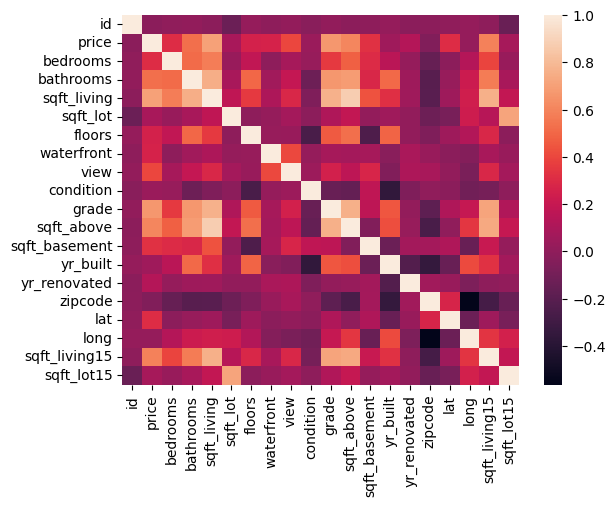

In [ ]:
sns.heatmap(houseData.corr(), annot=False)

### Verificação de Outliers no Price

<Axes: xlabel='price'>

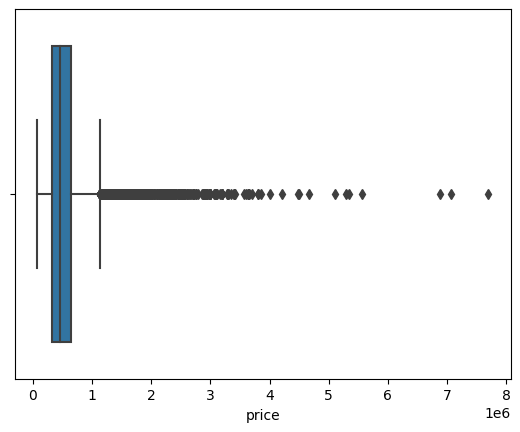

In [ ]:
sns.boxplot(x='price', data=houseData)

### Verificação de outliers legitimos, comparando com variáveis que sabemos ser importantes

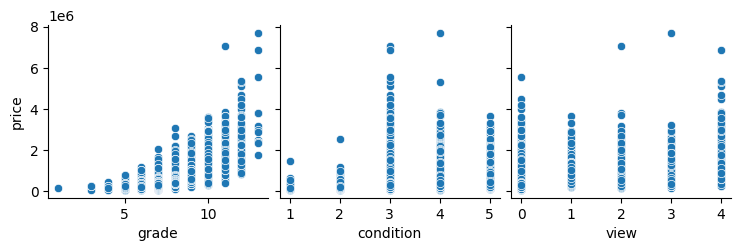

In [ ]:
sns.pairplot(houseData, x_vars=['grade', 'condition', 'view'], y_vars=['price'])

Foi verificado que os valores discrepantes dos preços, tem uma correlação com as grandezas de grade, condition e view. Desse modo não será necessário remover eles.

### Testando algumas variaveis pra ver se dropo ou não

<Axes: xlabel='waterfront', ylabel='price'>

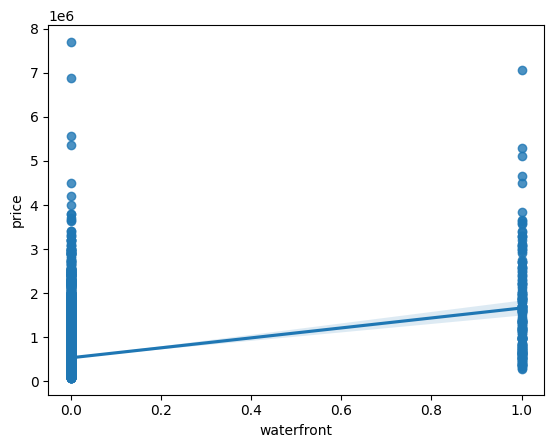

In [ ]:
sns.regplot(data=houseData, x='waterfront', y='price')

Waterfront tem uma relação linear com o preço, logo é importante. Só conferindo a hipótese anterior.

<Axes: xlabel='view', ylabel='price'>

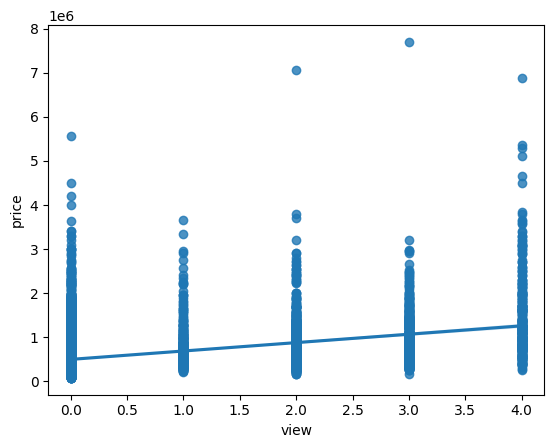

In [ ]:
sns.regplot(data=houseData, x='view', y='price')

Outra hipótese anterior confirmada, a view tem uma relação linear com o preço, embora haja bastante outliers que devem ser influênciados por outras variáveis.

<Axes: xlabel='sqft_living15', ylabel='price'>

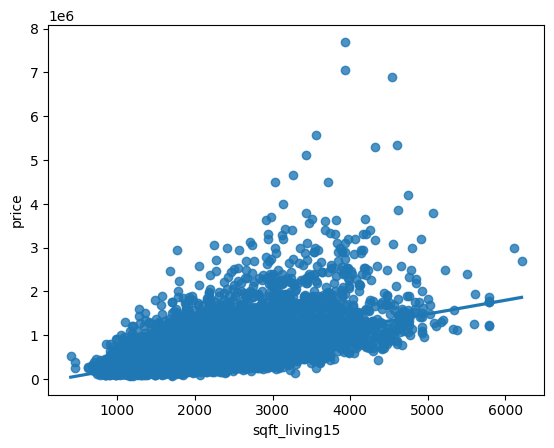

In [ ]:
sns.regplot(data=houseData, x='sqft_living15', y='price')

Relação é linear

<Axes: xlabel='sqft_lot15', ylabel='price'>

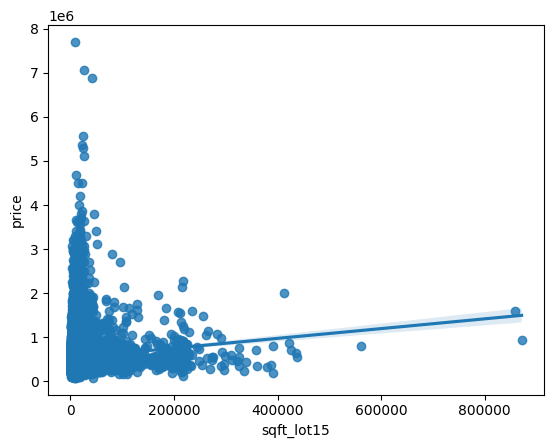

In [ ]:
sns.regplot(data=houseData, x='sqft_lot15', y='price')

Aparentemente ter vizinhos perto não influência tanto, a relação aparenta ter uma reta linear, mas o impacto no preço não parece ser correlacionado.

<Axes: xlabel='zipcode', ylabel='price'>

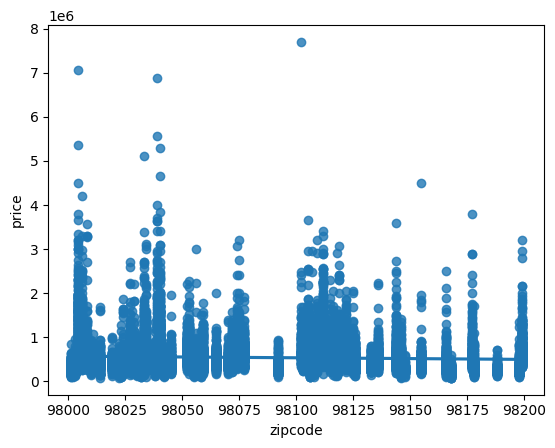

In [ ]:
sns.regplot(data=houseData, x='zipcode', y='price')

Não tem influência no valor

<Axes: xlabel='lat', ylabel='price'>

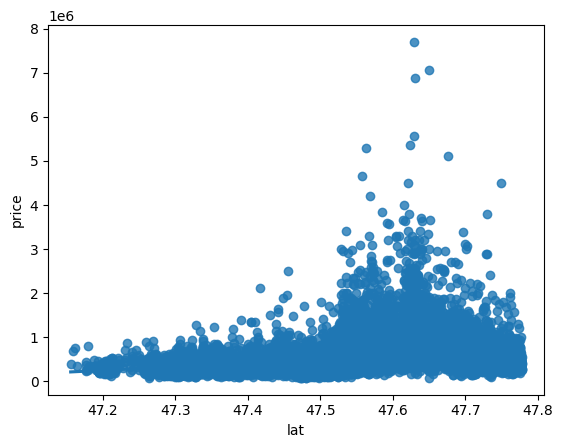

In [ ]:
sns.regplot(data=houseData, x='lat', y='price')

<Axes: xlabel='long', ylabel='price'>

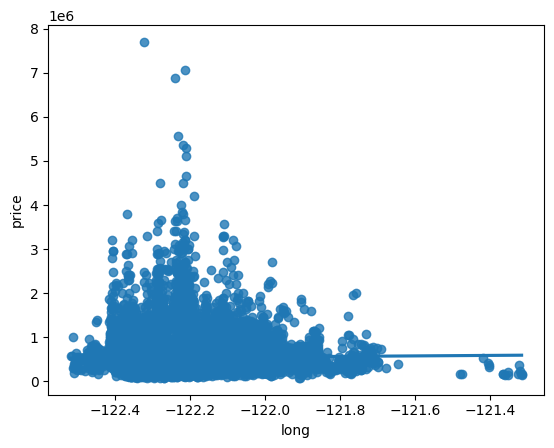

In [ ]:
sns.regplot(data=houseData, x='long', y='price')

Latitude e Longitude não são valores que da para visualizar como se fosse normalizando de 0 a 1 de importância, são valores que talvez X localização, vizinhança influêncie, então é meio trick usar eles.

### Cleaning & Some changes

In [ ]:
houseData = houseData.dropna()        # Limpa linhas com missing data
houseData = houseData.dropna(axis=1)  # Limpa colunas com missing data

Por garantia eliminar as colunas com valores faltando em ambos os eixos.

In [ ]:
houseData.drop([
    'id',
    'date',             # irrelevante pro preço
    'sqft_lot15',       # mostrado acima que relação não é linear
    'zipcode',          # mostrado que não há influência
    'sqft_basement',
    ], axis=1, inplace=True)
houseData.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,lat,long,sqft_living15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,1955,0,47.5112,-122.257,1340
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,1951,1991,47.7210,-122.319,1690


Dropar os valores que não agregam no modelo, curioso com o date se convertido pra algo o ano/mes em que foi vendido podia ajudar a relacionar a situação do mercado, valorização e desvalorização dos preços, mas acabei dropando sem tentar.

In [ ]:
houseData['age'] = (pd.Timestamp.now().year) - houseData['yr_renovated'].where(houseData['yr_renovated'] > 0, houseData['yr_built'])
#houseData.drop(columns=['yr_built', 'yr_renovated'], inplace=True)
houseData.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,lat,long,sqft_living15,age
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,1955,0,47.5112,-122.257,1340,68
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,1951,1991,47.7210,-122.319,1690,32


Aqui resolvi criar uma coluna adicional que é meio que pra saber o quão nova é a situação da casa, aumentou a acurácia, porém se remover as outras duas diminui, então deixei as três.

# 2 - Model

## 2.1 - Model

In [ ]:
y = houseData['price']
x = houseData.drop('price', axis=1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=5)

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [ ]:
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f'Média da Acurácia:')
print(f'R-squared (R²): {r2}')

Média da Acurácia:
R-squared (R²): 0.703516378261207


Sem muito o que falar do modelo, usei o mesmo que usamos em aula, com o código recomendado no documento.
Não consegui subir a acurácia acima de 0.7 infelizmente, mas acredito que seja um valor okay.